# 02. Data Understanding - PySpark

## 02.1. Importação das bibliotecas

### 02.1.1. Importando as bibliotecas nativas do Python

In [1]:
import sys

### 02.1.2. Importando as bibliotecas de terceiros

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession, types as T
from pyspark.sql.functions import *
# from ydata_profiling import ProfileReport

### 02.1.3. Importando os módulos locais do projeto

In [3]:
sys.path.append('..')
import functions.fn_charts_pandas as fn_charts_pandas
import functions.fn_stats_pyspark as fn_stats_pyspark
import params.consts as consts

## 02.2. Visão geral dos dados

### 02.2.0. Iniciando a sessão Spark

In [4]:
spark = SparkSession.builder.appName('spark').getOrCreate()

### 02.2.1. Habilitando a exibição de todas as colunas

In [5]:
pd.set_option('display.max_columns', None)

### 02.2.2. Armazenando o dataset em uma variável

In [6]:
df = spark.read \
    .format('csv') \
    .option('header', 'true') \
    .option('inferSchema', 'true') \
    .option('sep', ',') \
    .load(consts.DATASET_RAW_COMPRESSED_PYSPARK)

### 02.2.3. Visualizando a quantidade de linhas e colunas do dataset

In [7]:
(df.count(), len(df.columns))

(881666, 12)

### 02.2.4. Exibindo o dataset

In [8]:
df.show(5)

+----------+-----+------+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|CustomerID|idade|  sexo|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|assinatura|duracao_contrato|total_gasto|meses_ultima_interacao|cancelou|
+----------+-----+------+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|  193382.0| 62.0|Female|              24.0|          30.0|                3.0|       13.0|     Basic|          Annual|      410.0|                  27.0|     1.0|
|  193383.0| 29.0|  Male|               7.0|          11.0|                7.0|       29.0|  Standard|          Annual|      598.0|                   5.0|     1.0|
|  193384.0| 21.0|  Male|              16.0|           9.0|                7.0|       23.0|   Premium|       Quarterly|      988.0|                   9.0|     1.0|
|  193385.0| 23.

### 02.2.5. Visualizando os detalhes do dataset

In [9]:
df.printSchema()

root
 |-- CustomerID: double (nullable = true)
 |-- idade: double (nullable = true)
 |-- sexo: string (nullable = true)
 |-- tempo_como_cliente: double (nullable = true)
 |-- frequencia_uso: double (nullable = true)
 |-- ligacoes_callcenter: double (nullable = true)
 |-- dias_atraso: double (nullable = true)
 |-- assinatura: string (nullable = true)
 |-- duracao_contrato: string (nullable = true)
 |-- total_gasto: double (nullable = true)
 |-- meses_ultima_interacao: double (nullable = true)
 |-- cancelou: double (nullable = true)



### 02.2.6. Visualizando as estatísticas das colunas numéricas

In [10]:
fn_stats_pyspark.summary(df).show(truncate = False)

+-------+----------+--------+------+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|summary|CustomerID|idade   |sexo  |tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|assinatura|duracao_contrato|total_gasto|meses_ultima_interacao|cancelou|
+-------+----------+--------+------+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|count  |881664.0  |881664.0|881664|881663.0          |881663.0      |881664.0           |881664.0   |881661    |881663          |881664.0   |881664.0              |881664.0|
|mean   |225398.67 |39.37   |NULL  |31.26             |15.81         |3.6                |12.97      |NULL      |NULL            |631.62     |14.48                 |0.57    |
|stddev |129531.85 |12.44   |NULL  |17.26             |8.59          |3.07               |8.26       |NULL      |NULL        

### 02.2.7. Visualizando as estatísticas da colunas categóricas

In [11]:
categorical_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, T.StringType)]

df.describe(categorical_columns).show()

+-------+------+----------+----------------+
|summary|  sexo|assinatura|duracao_contrato|
+-------+------+----------+----------------+
|  count|881664|    881661|          881663|
|   mean|  NULL|      NULL|            NULL|
| stddev|  NULL|      NULL|            NULL|
|    min|Female|     Basic|          Annual|
|    max|  Male|  Standard|       Quarterly|
+-------+------+----------+----------------+



### 02.2.8. Verificando as colunas com valores nulos

In [12]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+-----+----+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|CustomerID|idade|sexo|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|assinatura|duracao_contrato|total_gasto|meses_ultima_interacao|cancelou|
+----------+-----+----+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+
|         2|    2|   2|                 3|             3|                  2|          2|         5|               3|          2|                     2|       2|
+----------+-----+----+------------------+--------------+-------------------+-----------+----------+----------------+-----------+----------------------+--------+



## 02.3. Entendimento dos dados

### 02.3.1. Gerando o relatório Profile Report e salvando em HTML

In [13]:
# report_eda = ProfileReport(df)

# report_eda.to_file(consts.EDA_0)

### 02.3.2. Confirmando os insights encontrados a partir do relatório 

- Agrupamento da coluna: assinatura
+----------+----------+------+
|assinatura|Percentage|Count |
+----------+----------+------+
|NULL      |0.0       |5     |
|Basic     |32.4      |286052|
|Premium   |33.7      |297354|
|Standard  |33.8      |298255|
+----------+----------+------+



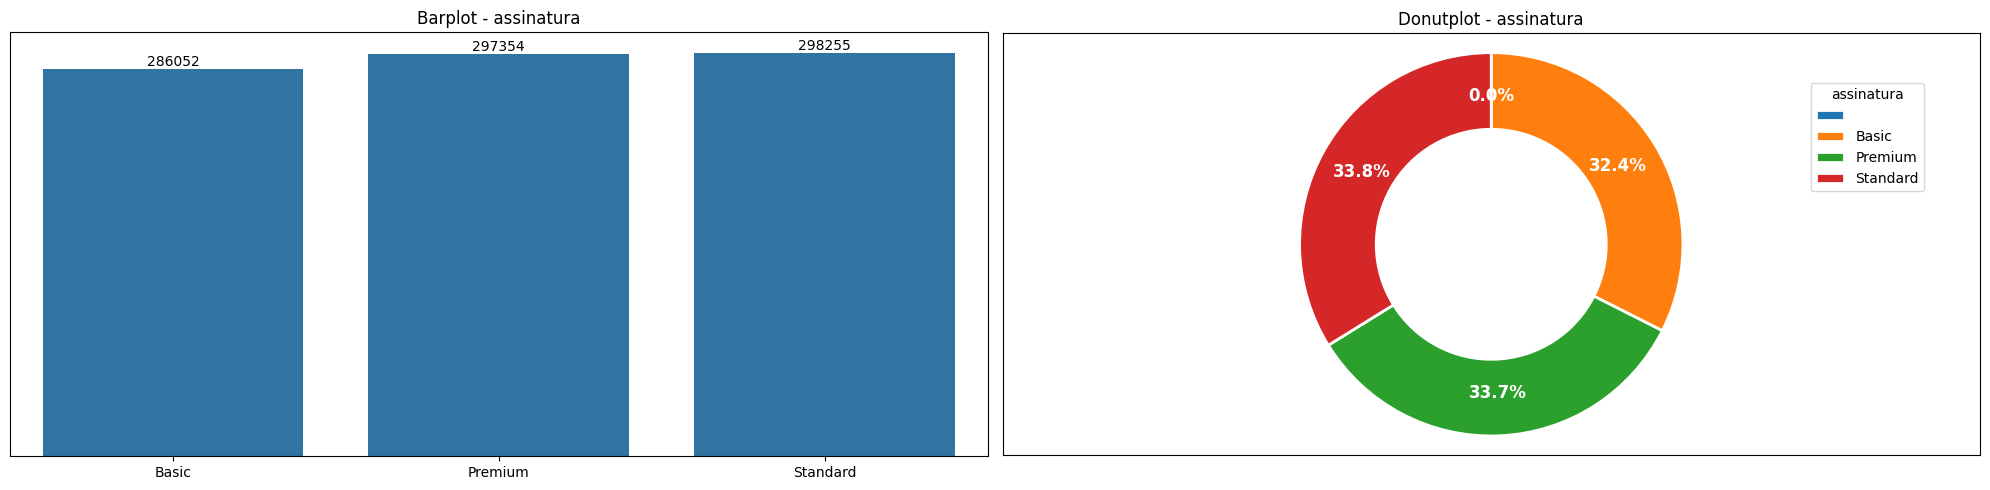

- Agrupamento da coluna: duracao_contrato
+----------------+----------+------+
|duracao_contrato|Percentage|Count |
+----------------+----------+------+
|NULL            |0.0       |3     |
|Annual          |40.2      |354396|
|Monthly         |19.8      |174207|
|Quarterly       |40.0      |353060|
+----------------+----------+------+



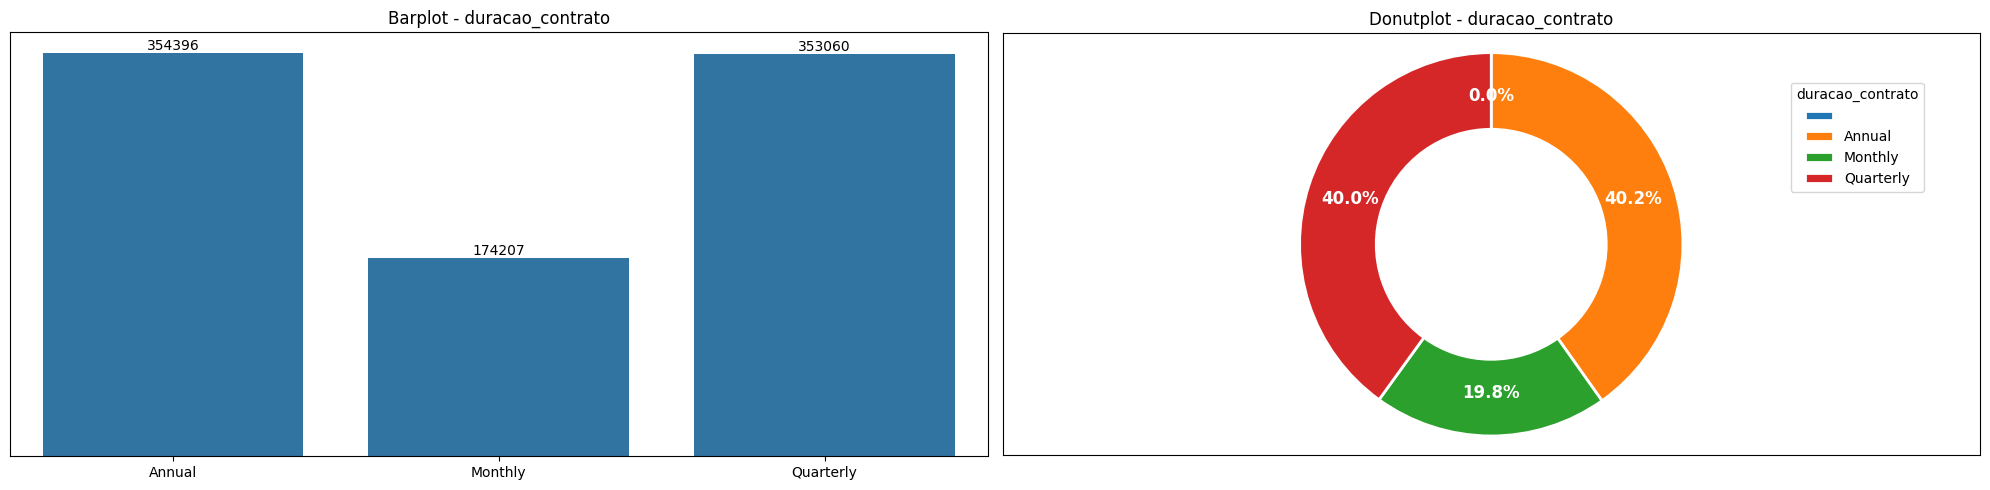

In [15]:
columns = ['assinatura', 'duracao_contrato']

for i in columns:

    df_agg = fn_stats_pyspark.groupby_count(df, i)

    print(f'- Agrupamento da coluna: {i}')
    
    df_agg.show(truncate = False)

    fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), i, 'Count')

    plt.savefig(f'../images/outputs/charts/pyspark/nb02_barplot_donutplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

### 02.3.3. Listando os problemas encontrados nos dados a partir da análise do relatório e suas soluções

- **Colunas que devem ter o tipo de dados corrigido** 
    - **Comentários gerais:** Colunas com o tipo de dados errado geralmente não permite seguir com análises e modelos de machine learning, pois o fato do tipo de dados estar errado inviabiliza operações de cálculos, textos e datas de acordo com o tipo ideal. Em casos assim, o ideal é corrigir o tipo de dados das colunas.
    1. **N/A**

    <br>
- **Colunas que devem ter valores nulos/vazios tratados** 
    - **Comentários gerais:** N/A.
    1. **CustomerID** 
        - **Problema:** A coluna CustomerID apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna CustomerID.
    2. **idade** 
        - **Problema:** A coluna idade apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna idade.
    3. **sexo** 
        - **Problema:** A coluna sexo apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna sexo.
    4. **tempo_como_cliente** 
        - **Problema:** A coluna tempo_como_cliente apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna tempo_como_cliente.
    5. **frequencia_de_uso** 
        - **Problema:** A coluna frequencia_de_uso apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna frequencia_de_uso.
    6. **ligacoes_callcenter** 
        - **Problema:** A coluna ligacoes_callcenter apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna ligacoes_callcenter.
    7. **dias_atraso** 
        - **Problema:** A coluna dias_atraso apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna dias_atraso.
    8. **assinatura** 
        - **Problema:** A coluna assinatura apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna assinatura.
    9. **duracao_contrato** 
        - **Problema:** A coluna duracao_contrato apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna duracao_contrato.
    10. **total_gasto** 
        - **Problema:** A coluna total_gasto apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna total_gasto.
    11. **meses_ultima_interacao** 
        - **Problema:** A coluna meses_ultima_interacao apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna meses_ultima_interacao.
    12. **cancelou** 
        - **Problema:** A coluna cancelou apresenta registros nulos.
        - **Solução:** Remover os registros nulos da coluna cancelou.

    <br>
- **Colunas de tempo/idade que devem ser criadas a partir de colunas de data**
    - **Comentários gerais:** Colunas de data geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois datas, anos, meses e dias aletarórios não significam muita coisa. Em casos assim, o ideal é criar a partir dessas colunas, novas colunas com informações de tempo decorrido e idade para revelar novos padrões no conjunto de dados. Além disso, para que essas colunas de dias, meses, anos e idade não fiquem variando a cada vez que o notebook for executado, foi usado o valor máximo das datas da campanha como referência do dia atual para evitar isso.
    1. **N/A**

    <br>
- **Colunas que devem ter categorias mescladas** 
    - **Comentários gerais:** Colunas com muitas categorias geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois os dados ficam muito dispersos e não refletem possíveis padrões estatísticos do conjunto de dados. Em casos assim, o ideal é agrupar a categoria dos dados para que fiquem mais concisos e possam revelar padrões.
    1. **N/A**

    <br>
- **Colunas que devem ser unificadas**
    - **Comentários gerais:** Colunas com informações repetitivas geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois costuma dizer a mesma coisa de formas diferentes. Em casos assim, o ideal é unificar essas colunas para que a informação fique concentrada em apenas uma coluna.
    1. **N/A**

    <br>
- **Colunas que devem ser criadas derivadas de outras**
    - **Comentários gerais:** Modelos de machine learning geralmente encontram padrões mais facilmente em colunas binárias, ou seja, 0 ou 1. Em casos assim, o ideal é criar colunas que refletem esse padrão binário dos dados para que possa facilitar o processo de aprendizado do modelo.
    1. **N/A**

    <br>
- **Colunas que devem ter valores outliers tratados** 
    - **Comentários gerais:** Colunas com valores outliers geralmente podem ocasionar erros importantes em análises e modelos de machine learning, pois estão destoando dos padrões estatísticos do conjunto de dados. Em casos assim, o ideal é remover esses outliers caso sejam poucos e estejam destoando muito dos demais.
    1. **N/A**

    <br>
- **Colunas que devem ser excluídas por valores únicos** 
    - **Comentários gerais:** Colunas com valores únicos geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois são comumente identificadores como Id, nome ou CPF. Em casos assim, o ideal é excluir essas colunas do conjunto de dados. E lembrando que ao remover colunas com identificadores únicos é possível que o conjunto de dados passe a ter registros duplicados, já que é possível que hajam duas pessoas com tudo igual menos o identificador. Nesse caso, a verificação de registros duplicados deve ser feita anteriormente.
    1. **CustomerID**
        - **Problema:** A coluna CustomerID apresenta valores com altíssima cardinalidade.
        - **Solução:** Excluir a coluna CustomerID do conjunto de dados.

    <br>
- **Colunas que devem ser excluídas por valores constantes** 
    - **Comentários gerais:** Colunas com valores iguais ou constantes geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois todos os registros possuem o mesmo valor. Em casos assim, o ideal é excluir essas colunas do conjunto de dados.
    1. **N/A**

    <br>
- **Colunas que devem ser excluídas após serem utilizadas como apoio** 
    - **Comentários gerais:** Colunas usadas como apoio durante a criação de novas colunas geralmente não apresentam informações relevantes para análises e modelos de machine learning, pois já foi extraído o que se precisava delas e além disso, excesso de informações, principalmente repetitivas atrapalham a performance de molodes de machine learning. Em casos assim, o ideal é excluir essas colunas do conjunto de dados.
    1. **N/A**